**Regressão logística com Scikit-learn**

Para implementar a regressão logística com o Scikit-learn, você precisa entender o processo de modelagem do Scikit-learn e a regressão linear.

As etapas para construir uma regressão logística incluem:

Importe os pacotes , classes e funções.
Carregue os dados.
Análise Exploratória de Dados (AED).
Transforme os dados, se necessário.
Ajustar o modelo de classificação.
Avalie o modelo de desempenho.

**Importando pacotes**

Primeiro, você precisa importar Seaborn para visualização, NumPy e Pandas . Além disso, importe:

LogisticRegression para ajuste do modelo.
confusion_matrix e classification_report para avaliar o modelo.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

**Carregando o conjunto de dados**

Importe o   conjunto de dados Social Network Ads do Kaggle . Os dados são um arquivo CSV com dados que nos ajudarão a construir um modelo de regressão logística para mostrar **quais usuários compraram ou não compraram um produto.**

In [ ]:
social_N_data = pd.read_csv('/content/Social_Network_Ads.csv')
pd.concat([social_N_data.head(), social_N_data.tail()])

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


**Análise exploratória de dados**

Analisar os dados primeiro é a chave para entender suas características. Começaremos verificando os valores ausentes.

In [ ]:
#CHECK FOR NULL VALUES
social_N_data.isnull().any()


User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

Nenhum valor nulo no conjunto de dados.

Confira o total de quem comprou e de quem não comprou:

<Axes: xlabel='Purchased', ylabel='count'>

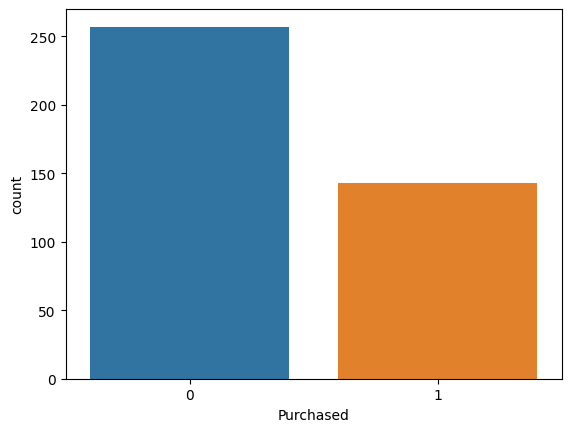

In [ ]:
sns.countplot(x='Purchased', data=social_N_data)


Zero indica quem não comprou e 1 para quem comprou.

Confira quantos homens e mulheres compraram o produto:

<Axes: xlabel='Purchased', ylabel='count'>

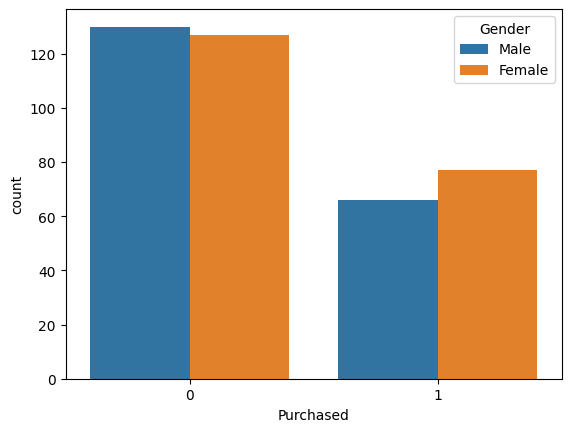

In [ ]:
sns.countplot(x='Purchased', hue='Gender', data=social_N_data)


A partir do gráfico, podemos ver que a maioria das pessoas que não compraram são do sexo masculino, e a maioria das que compraram são do sexo feminino.

Também podemos verificar a distribuição etária no conjunto de dados:

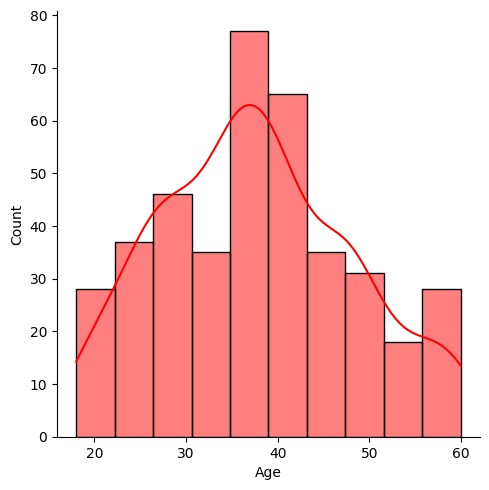

In [ ]:
sns.displot(x='Age', data=social_N_data, color='red', kde=True)


**Limpando os dados**

Usaremos as colunas Gender, Age e EstimatedSalary do conjunto de dados para a regressão logística. Isso significa que não precisamos da UserID coluna. Assim vamos abandoná-lo.

In [ ]:
# CLEAN THE DATA
social_N_data.drop('User ID', axis=1, inplace=True)
pd.concat([social_N_data.head(), social_N_data.tail()])



,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


**Transformando dados categóricos em fictícios**

Vamos examinar o info conjunto de dados para ter uma ideia geral do que ele contém.

In [ ]:
social_N_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


A Gender variável é categórica. Para que o modelo funcione, vamos convertê-lo em variáveis dummy usando os Pandas get_dummies ou o método oneHotEncoder.

Altere Gender para a variável dummy e descarte o primeiro dummy para evitar multicolinearidade:

In [ ]:
gender = pd.get_dummies(social_N_data['Gender'], drop_first=True)

In [ ]:
social_N_data.drop('Gender',axis=1,inplace=True)

In [ ]:
social_N_data = pd.concat([social_N_data,gender], axis=1)
social_N_data.head(8)

,Age,EstimatedSalary,Purchased,Male,Male
0,19,19000,0,1,1
1,35,20000,0,1,1
2,26,43000,0,0,0
3,27,57000,0,0,0
4,19,76000,0,1,1
5,27,58000,0,1,1
6,27,84000,0,0,0
7,32,150000,1,0,0


Quando o valor Masculino é 1, significa que o gênero é masculino, e quando o valor é 0, o gênero é feminino. Não exigimos as variáveis ​​Feminino e Sexo no conjunto de dados, pois uma pode ser usada para prever a outra.



**Dividindo os dados em variáveis ​​independentes (X) e dependentes (y)**

Divida os dados em variáveis ​​independentes e dependentes.

In [ ]:
X = social_N_data.iloc[:,[0,1,3]] # Age, EstimatedSalary and Male
X.head()

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [ ]:
y = social_N_data.iloc[:, 2] # Purchased
y


0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

**Dimensionamento de recursos**

**O dimensionamento de recursos** é um método usado para normalizar o intervalo de variáveis ​​independentes. O método permite que as variáveis ​​independentes estejam no mesmo intervalo.

Ao trabalhar com grandes conjuntos de dados, o dimensionamento desempenha um papel significativo na melhoria do desempenho do modelo.

Nos dados, vamos importar o módulo StandardScaler Scikit-learn preprocessing e usá-lo para transformar os dados. Por exemplo, existe uma grande diferença entre os valores da variável Age e os de EstimatedSalary.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

**Dividindo o conjunto de dados em conjuntos de treinamento e teste**

Divida o conjunto de dados em conjuntos de treinamento e teste usando a função train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 3)
(120, 3)
(280,)
(120,)


**Ajustando o modelo de regressão logística e prevendo os resultados do teste**

Agora que o conjunto de dados está bem preparado, podemos treinar o modelo importando a classe LogisticRegression do módulo linear_model Scikit-learn.

O treinamento é feito chamando o médodo fit e passando os dados de treinamento.

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

O modelo agora é treinado no conjunto de treinamento. Vamos realizar a previsão no conjunto de teste usando método predict.



In [ ]:
y_pred = classifier.predict(X_test)

Vamos criar um Pandas DataFrame e comparar os valores previstos e reais.  



In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
398,0,0
125,0,0
328,1,1
339,1,1
172,0,0
...,...,...
91,0,0
322,0,0
248,0,0
186,0,0


Os atributos coef_ e intercept_ fornecem o coeficiente e a interceptação do modelo.



In [ ]:
classifier.coef_

array([[2.36839196, 1.42929561, 0.20973787]])

In [ ]:
classifier.intercept_ 

array([-1.1352347])

**Avaliando o modelo**
Existem várias maneiras de verificar o desempenho do modelo.

**Usando**
predict_proba
Ele retorna a matriz de probabilidades de que a saída prevista seja igual a zero ou um.

In [ ]:
print(classifier.predict_proba(X))

[[9.99305047e-01 6.94953436e-04]
 [9.73650395e-01 2.63496050e-02]
 [9.93938614e-01 6.06138563e-03]
 [9.86425967e-01 1.35740330e-02]
 [9.92449933e-01 7.55006749e-03]
 [9.78634880e-01 2.13651200e-02]
 [9.59015410e-01 4.09845897e-02]
 [3.21160956e-01 6.78839044e-01]
 [9.95160538e-01 4.83946203e-03]
 [8.94774017e-01 1.05225983e-01]
 [9.71990649e-01 2.80093506e-02]
 [9.91181077e-01 8.81892308e-03]
 [9.85694423e-01 1.43055770e-02]
 [9.87533664e-01 1.24663357e-02]
 [9.92255565e-01 7.74443464e-03]
 [9.20459783e-01 7.95402167e-02]
 [6.64896819e-01 3.35103181e-01]
 [7.49443667e-01 2.50556333e-01]
 [6.86862714e-01 3.13137286e-01]
 [6.70546154e-01 3.29453846e-01]
 [7.79633457e-01 2.20366543e-01]
 [5.24342635e-01 4.75657365e-01]
 [4.47060141e-01 5.52939859e-01]
 [8.43313433e-01 1.56686567e-01]
 [7.30142964e-01 2.69857036e-01]
 [7.09930944e-01 2.90069056e-01]
 [5.26688397e-01 4.73311603e-01]
 [7.09899857e-01 2.90100143e-01]
 [9.82040967e-01 1.79590333e-02]
 [9.90032335e-01 9.96766502e-03]
 [9.044789

Da matriz, cada linha representa uma única observação. A primeira coluna é a probabilidade de o produto não ser comprado (1-p(x)) e a segunda coluna é a probabilidade de o produto ser comprado (p(x)).



**Usando matriz de confusão**
Do módulo Scikit-learn, importamos arquivos . A matriz de confusão é o número de previsões corretas e incorretas por coluna, mostrando os seguintes valores: metrics confusion_matrix

**Verdadeiros negativos (TN - True negatives)** na posição superior esquerda.

**Falsos negativos (FN - False negatives)** na posição inferior esquerda.

**Falsos positivos (FP - False positives)** na posição superior direita.

**Verdadeiros positivos (TP - True positives)** na posição inferior direita.

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[63,  9],
       [14, 34]])

A saída da matriz de confusão é uma matriz 2*2, pois o modelo é uma classificação binária. Vamos visualizar melhor usando um mapa de calor e explicar.



Text(0.5, 23.52222222222222, 'Predicted label')

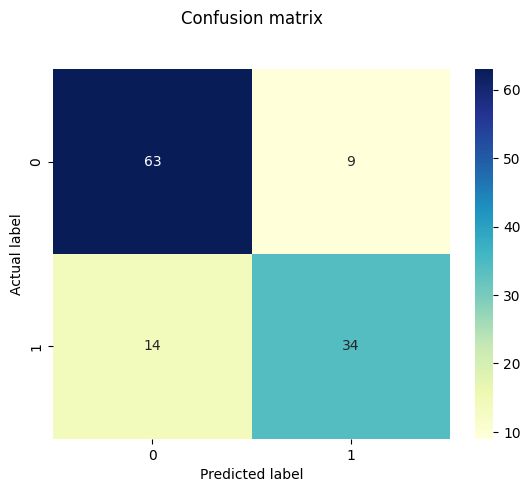

In [ ]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

A partir de confusion_matrix, temos as seguintes observações:

63 previsões TN: zeros previstos corretamente.

14 previsões FN: uns previstos erroneamente como zeros.

9 Previsões FP: zeros que foram erroneamente previstos como uns.

34 previsões TP: aquelas previstas corretamente.

**Para calcular a precisão** do modelo a partir da matriz de confusão, dividimos a soma de TN e TP pela soma de todas as previsões.

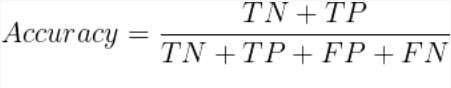


In [ ]:
Accuracy = (63 + 34)/(63 + 34 + 9 + 14)
Accuracy

0.8083333333333333

In [ ]:
# Also same result from sklearn accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8083333333333333

A precisão do nosso modelo é de cerca de 80%, o que é ideal.

**Métricas da matriz de confusão**

O classification_report fornece um relatório mais abrangente do desempenho do modelo.

In [ ]:
target_names = ['will NOT PURCHASE', 'will PURCHASE']
print(classification_report(y_test, y_pred,target_names=target_names))

                   precision    recall  f1-score   support

will NOT PURCHASE       0.82      0.88      0.85        72
    will PURCHASE       0.79      0.71      0.75        48

         accuracy                           0.81       120
        macro avg       0.80      0.79      0.80       120
     weighted avg       0.81      0.81      0.81       120



Fonte: https://www.machinelearningnuggets.com/logistic-regression/